# POSTTEST 7

## Link Dataset

https://www.kaggle.com/datasets/marquis03/flower-classification

##### Membuat Direktori Baru dari Kaggle

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d marquis03/flower-classification

 90% 185M/205M [00:01<00:00, 121MB/s]
100% 205M/205M [00:01<00:00, 113MB/s]


##### Mengeluarkan  FIle dari ZIP

In [3]:
!unzip flower-classification.zip -d flower

Streaming output truncated to the last 5000 lines.
  inflating: flower/train/iris/17858672081_4b4d071116_c.jpg  
  inflating: flower/train/iris/17885928250_451875aec2_c.jpg  
  inflating: flower/train/iris/17948299355_2161a031db_c.jpg  
  inflating: flower/train/iris/17959086836_3e706d918b_c.jpg  
  inflating: flower/train/iris/18054931376_23052f68d0_c.jpg  
  inflating: flower/train/iris/18059533553_186ccb451a_c.jpg  
  inflating: flower/train/iris/18076633321_400ea17b5a_c.jpg  
  inflating: flower/train/iris/18120244292_ea11fcc9c5_c.jpg  
  inflating: flower/train/iris/181379030_afebe26851_c.jpg  
  inflating: flower/train/iris/18141122602_118114762d_c.jpg  
  inflating: flower/train/iris/18256508742_af6a8f4222_c.jpg  
  inflating: flower/train/iris/18280071332_c6bc90d75a_c.jpg  
  inflating: flower/train/iris/18348714266_33a7bf205f_c.jpg  
  inflating: flower/train/iris/18504796248_9548f45757_c.jpg  
  inflating: flower/train/iris/18519018712_9ae5d4be08_c.jpg  
  inflating: flower/t

## Data Preparation

##### Penginstalan Library Split Folders

In [4]:
!pip install split-folders

##### Membuat Direktori Baru dan Memindahkan Data yang Ingin Digunakan

In [5]:
!mkdir flower_new
!cp -r flower/train/calendula flower_new
!cp -r flower/train/rose flower_new
!cp -r flower/train/sunflower flower_new

In [6]:
!cp -r flower/val/calendula flower_new
!cp -r flower/val/rose flower_new
!cp -r flower/val/sunflower flower_new

In [7]:
import splitfolders

In [8]:
splitfolders.ratio(
    "flower_new",
    output="dataset_final",
    ratio=[.8,.1,.1]
)

Copying files: 3031 files [00:01, 2304.98 files/s]


##### Augmentasi pada Data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    brightness_range = [0.9, 1.1],
    horizontal_flip = True,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale = 1/255
)

## Data Split

In [11]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size = (256, 256),
    batch_size = 128,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size = (256, 256),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 2424 images belonging to 3 classes.
Found 302 images belonging to 3 classes.


## CNN

##### Sequential Model dan Model Compile

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape =(256, 256, 3)),
    MaxPooling2D(2,2),
    Conv2D(16, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(16, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(3, activation = 'softmax')
])

model.compile (optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

##### Fungsi Callback

In [14]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

##### Fit Model

In [17]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 15, verbose = 1,
                    callbacks = [es])

Epoch 1/15
19/19 [==============================] - 42s 2s/step - loss: 0.1871 - accuracy: 0.9307 - val_loss: 0.2065 - val_accuracy: 0.9272
Epoch 2/15
19/19 [==============================] - 43s 2s/step - loss: 0.1820 - accuracy: 0.9282 - val_loss: 0.2181 - val_accuracy: 0.9305
Epoch 3/15
19/19 [==============================] - 42s 2s/step - loss: 0.1662 - accuracy: 0.9369 - val_loss: 0.1698 - val_accuracy: 0.9503
Epoch 4/15
19/19 [==============================] - 42s 2s/step - loss: 0.1505 - accuracy: 0.9398 - val_loss: 0.3181 - val_accuracy: 0.8444
Epoch 5/15
19/19 [==============================] - 42s 2s/step - loss: 0.2056 - accuracy: 0.9245 - val_loss: 0.1889 - val_accuracy: 0.9338
Epoch 6/15
19/19 [==============================] - 42s 2s/step - loss: 0.1542 - accuracy: 0.9385 - val_loss: 0.1817 - val_accuracy: 0.9437
Epoch 7/15
19/19 [==============================] - 42s 2s/step - loss: 0.1332 - accuracy: 0.9493 - val_loss: 0.2846 - val_accuracy: 0.8907
Epoch 8/15
19/19 [==

In [18]:
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [19]:
test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size = (256, 256),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 305 images belonging to 3 classes.


##### Evaluasi Model

In [20]:
model.evaluate(test_generator)

3/3 [==============================] - 1s 379ms/step - loss: 0.2605 - accuracy: 0.9246


[0.26049667596817017, 0.9245901703834534]

##### Menampilkan Grafik Pergerakan Metrik

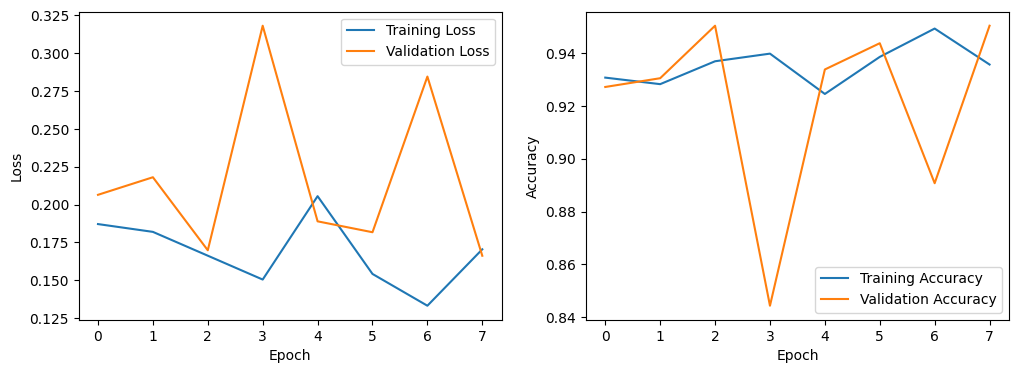

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()